In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#importing dataset
data=pd.read_csv('data.csv')
data.index

RangeIndex(start=0, stop=2001, step=1)

In [3]:
#checking nulls
data.isna().sum()

user_id                0
username               0
age                    0
status                 0
sex                    0
orientation            0
drinks                 0
drugs                  0
height                 0
job                    0
location               0
pets                   0
smokes                 0
language               0
new_languages          0
body_profile           0
education_level        0
dropped_out            0
bio                    0
interests              0
other_interests        0
location_preference    0
dtype: int64

In [222]:
data['username'].value_counts()

Mary Perez          2
Daniel Harris       2
James Davidson      2
Mary Taylor         2
Robert Rodriguez    2
                   ..
Becky Popek         1
Antwan Davis        1
Carol Martinez      1
Maria Wood          1
Ana Sellers         1
Name: username, Length: 1995, dtype: int64

In [4]:
#as of now username is not of any use so dropping it and dropping userid too
data=data.drop(['username','user_id'],axis=1)

In [5]:
data.head(5)

,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state
1,26,single,m,gay,socially,never,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere
2,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city
3,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city
4,22,single,f,bisexual,often,sometimes,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city


In [210]:
#Descriptive Statistics
data.describe()

,age,height,education_level
count,2001.000000,2001.000000,2001.000000
mean,33.072464,68.289855,2.932534
std,10.483189,3.895246,0.812371
min,18.000000,55.000000,1.000000
25%,26.000000,65.000000,2.000000
50%,30.000000,68.000000,3.000000
75%,39.000000,71.000000,3.000000
max,69.000000,83.000000,5.000000


In [6]:
#Separating continuous and categorical columns
columns=data.columns
categorical_cols=[]
numeric_cols=[]
for col in columns:
    if data[col].dtype=='O':
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)
categorical_cols
numeric_cols

['age', 'height', 'education_level']

In [7]:
#removing bio column from categorical cols for visualization purpose
categorical_cols.remove('bio')

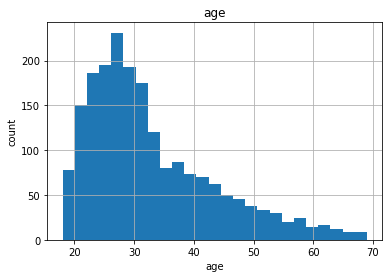

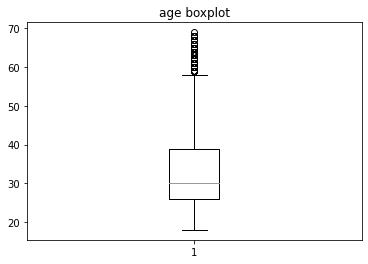

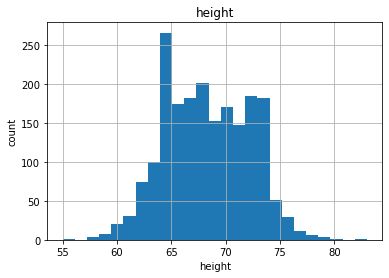

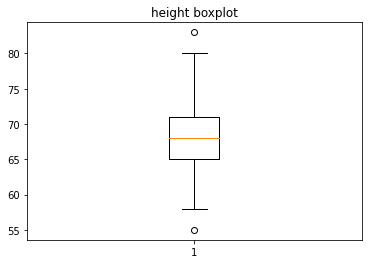

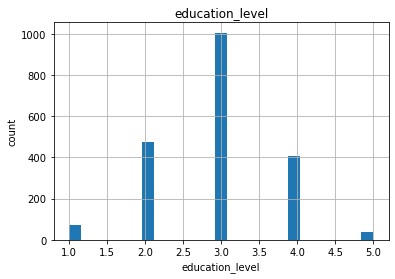

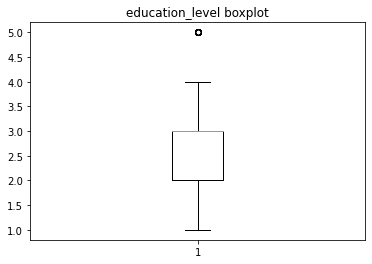

In [8]:
for colname in numeric_cols:
    data[colname].hist(bins=25)
    plt.xlabel(colname)
    plt.ylabel('count')
    plt.title(colname)
    plt.show()
    plt.boxplot(data[colname])
    plt.title(colname+' boxplot')
    plt.show()

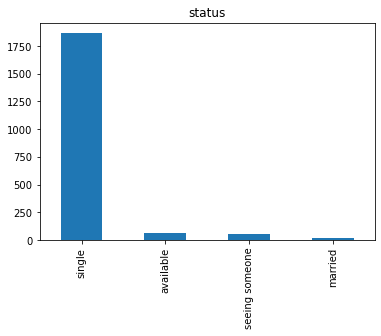

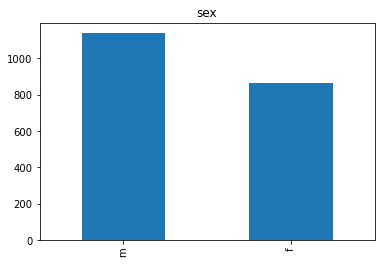

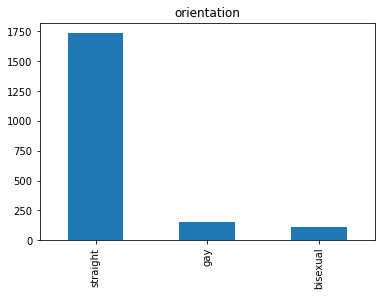

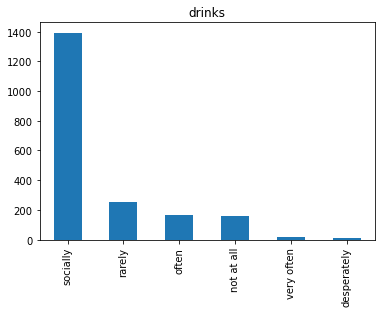

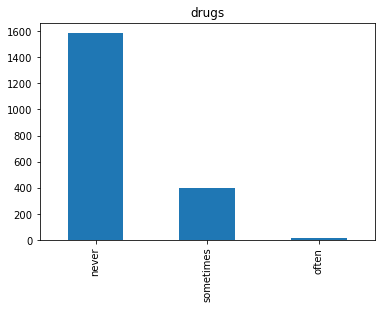

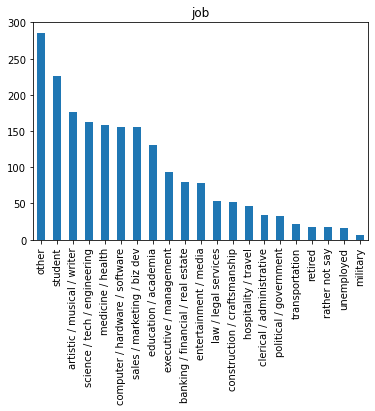

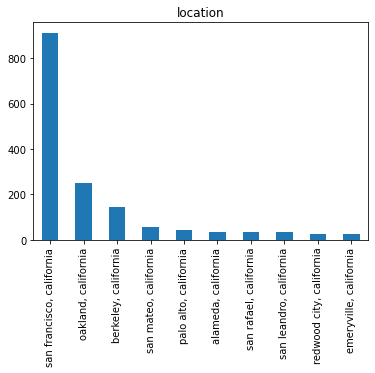

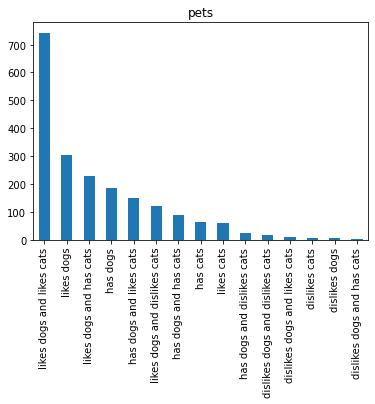

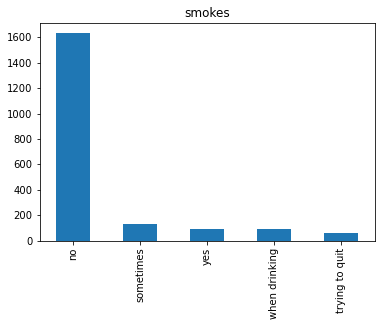

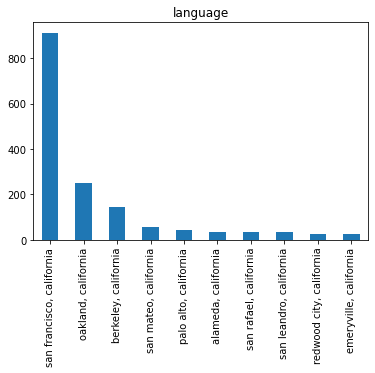

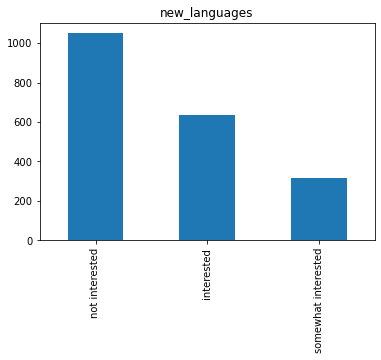

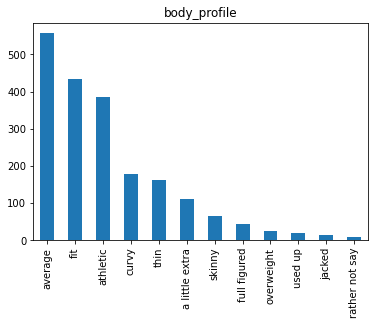

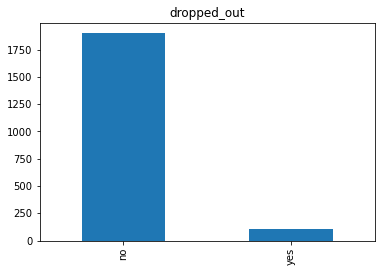

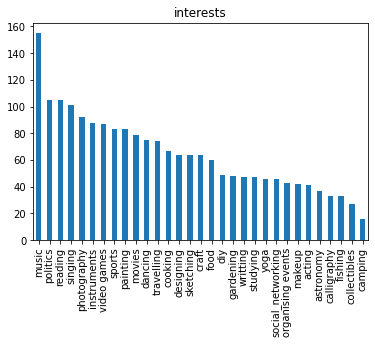

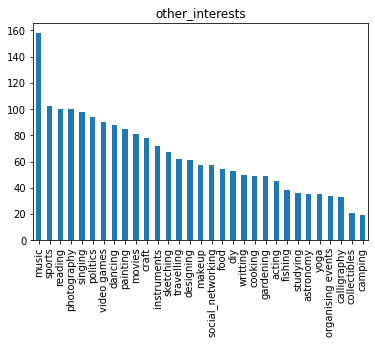

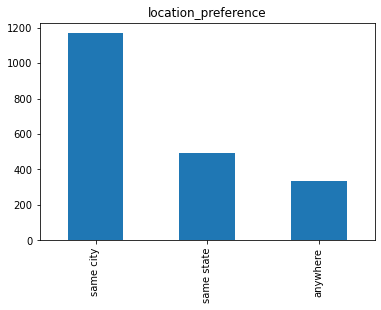

In [9]:
for cols in categorical_cols:
    if cols!='user_id':
        if cols=='language' or cols=='location':
            data['location'].value_counts()[:10].plot(kind='bar')
            plt.title(cols)
            plt.show()
        else:
            data[cols].value_counts().plot(kind='bar')
            plt.title(cols)
            plt.show()

In [10]:
#saving data before removing outliers
data.to_csv('DataBeforeOutlierTreatment.csv')

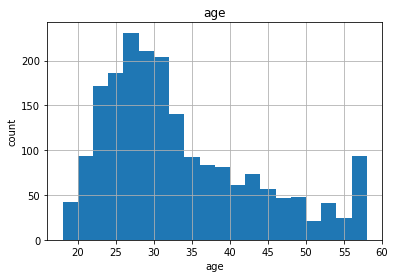

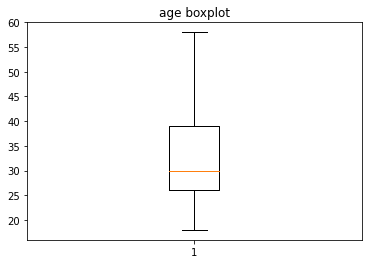

In [11]:
#feature engineering
#Declaring all 58+ age as 58 (instead of deleting outliers) 

data['age']=data['age'].apply(lambda x: 58 if x>58 else x)

colname='age'
data['age'].hist(bins=20)
plt.xlabel(colname)
plt.ylabel('count')
plt.title(colname)
plt.show()
plt.boxplot(data[colname])
plt.title(colname+' boxplot')
plt.show()

In [12]:
#saving data After outlier treatment
data.to_csv('DataAfterOutlierTreatment.csv')

"\nimport PrepAuto.RemoveOutliers as pa\ndata_copy=data.copy()\ndata_copy=pa.remove_outliers(data_copy,rmv_out=True,exclude_column='age')\n"

In [13]:
#merging values under drinks column 
#very often and desperately merged to very often
data['drinks']=data['drinks'].apply(lambda x:'rarely' if x=='very often' else ('often' if x=='desperately' else x))

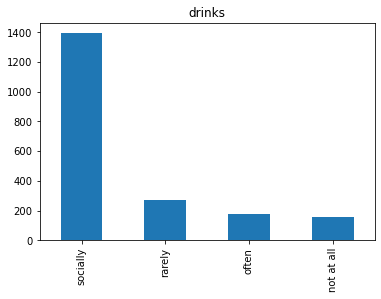

In [14]:
data['drinks'].value_counts().plot(kind='bar')
plt.title('drinks')
plt.show()

In [15]:
#handling drugs column
data['drugs']=data['drugs'].apply(lambda x: 'sometimes' if x=='often' else x)

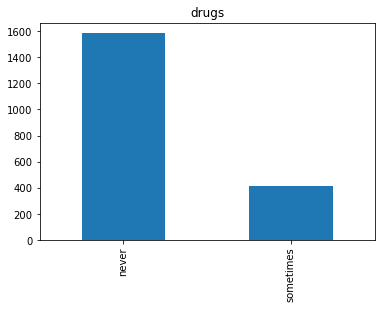

In [16]:
data['drugs'].value_counts().plot(kind='bar')
plt.title('drugs')
plt.show()

In [17]:
#one hot encooding on sex,orientation,drinks,drugs 
#drop first setting as true try removing it once 
dummies=pd.get_dummies(data[['sex','orientation','drinks','drugs']],drop_first=True)
data=pd.concat([data,dummies],axis=1)
data=data.drop(['sex','orientation','drinks','drugs'],axis=1)
data.head(5)

,age,status,height,job,location,pets,smokes,language,new_languages,body_profile,...,interests,other_interests,location_preference,sex_m,orientation_gay,orientation_straight,drinks_often,drinks_rarely,drinks_socially,drugs_sometimes
0,27,single,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,...,sports,instruments,same state,0,1,0,0,0,1,0
1,26,single,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,...,painting,instruments,anywhere,1,1,0,0,0,1,0
2,20,seeing someone,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,...,instruments,dancing,same city,0,0,0,0,0,1,1
3,27,single,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,...,sketching,acting,same city,1,0,0,0,0,1,1
4,22,single,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,...,craft,designing,same city,0,0,0,1,0,0,1


In [18]:
#handling job column
data['job'].value_counts()

other                                286
student                              226
artistic / musical / writer          176
science / tech / engineering         163
medicine / health                    158
computer / hardware / software       156
sales / marketing / biz dev          156
education / academia                 131
executive / management                93
banking / financial / real estate     79
entertainment / media                 78
law / legal services                  54
construction / craftsmanship          52
hospitality / travel                  46
clerical / administrative             34
political / government                33
transportation                        22
retired                               18
rather not say                        17
unemployed                            16
military                               7
Name: job, dtype: int64

"data[data['job']=='retired']\ndrop_users=[126,966,1643]\ndata.drop(drop_users,axis=0,inplace=True)\ndata[data['job']=='retired']\n"

In [19]:
#job categories % 
data['job'].value_counts()/len(data)*100

other                                14.292854
student                              11.294353
artistic / musical / writer           8.795602
science / tech / engineering          8.145927
medicine / health                     7.896052
computer / hardware / software        7.796102
sales / marketing / biz dev           7.796102
education / academia                  6.546727
executive / management                4.647676
banking / financial / real estate     3.948026
entertainment / media                 3.898051
law / legal services                  2.698651
construction / craftsmanship          2.598701
hospitality / travel                  2.298851
clerical / administrative             1.699150
political / government                1.649175
transportation                        1.099450
retired                               0.899550
rather not say                        0.849575
unemployed                            0.799600
military                              0.349825
Name: job, dt

In [20]:
#merging some similar jobs like-
#science / tech / engineering            and         computer / hardware / software 
#rather not say unemployed retired  military    to    other

data['job']=data['job'].apply(lambda x:'science / tech / engineering' if x=='computer / hardware / software'
                                       else('other' if (x=='rather not say' or x=='unemployed' or x=='retired' or x=='military' or
                                                       x=='transportation' or x=='political / government' or x=='clerical / administrative'
                                                       or x=='hospitality / travel'  or x=='construction / craftsmanship' or x=='law / legal services')
                                           else x)
                                       )

In [21]:
data['job'].value_counts()/len(data)*100

other                                29.235382
science / tech / engineering         15.942029
student                              11.294353
artistic / musical / writer           8.795602
medicine / health                     7.896052
sales / marketing / biz dev           7.796102
education / academia                  6.546727
executive / management                4.647676
banking / financial / real estate     3.948026
entertainment / media                 3.898051
Name: job, dtype: float64

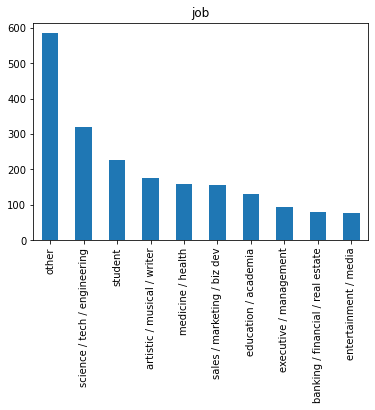

In [22]:
data['job'].value_counts().plot(kind='bar')
plt.title('job')
plt.show()

In [23]:
#encoding job
dummies=pd.get_dummies(data['job'],drop_first=True)
dummies

,banking / financial / real estate,education / academia,entertainment / media,executive / management,medicine / health,other,sales / marketing / biz dev,science / tech / engineering,student
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1996,0,0,0,0,0,0,0,0,1
1997,0,0,0,0,0,0,1,0,0
1998,0,0,0,0,0,0,1,0,0
1999,0,0,0,0,0,1,0,0,0


In [24]:
data=pd.concat([data,dummies],axis=1)
data.drop('job',axis=1,inplace=True)

In [25]:
data.to_csv('DataAfterJobDummmification.csv')

In [26]:
data.columns

Index(['age', 'status', 'height', 'location', 'pets', 'smokes', 'language',
       'new_languages', 'body_profile', 'education_level', 'dropped_out',
       'bio', 'interests', 'other_interests', 'location_preference', 'sex_m',
       'orientation_gay', 'orientation_straight', 'drinks_often',
       'drinks_rarely', 'drinks_socially', 'drugs_sometimes',
       'banking / financial / real estate', 'education / academia',
       'entertainment / media', 'executive / management', 'medicine / health',
       'other', 'sales / marketing / biz dev', 'science / tech / engineering',
       'student'],
      dtype='object')

In [27]:
#location column
#all entries from california so removing california from loaction , keeping only city name
data['location']=data['location'].apply(lambda x: x.split(', ')[0])
data['location'].value_counts().head(10)

san francisco    911
oakland          250
berkeley         146
san mateo         56
palo alto         45
san rafael        35
alameda           35
san leandro       33
redwood city      28
emeryville        27
Name: location, dtype: int64

In [33]:
data['location'].value_counts().head(15)


san francisco    911
oakland          250
berkeley         146
san mateo         56
palo alto         45
alameda           35
san rafael        35
san leandro       33
redwood city      28
daly city         27
emeryville        27
walnut creek      24
hayward           21
pacifica          18
el cerrito        17
Name: location, dtype: int64

In [28]:
#handling pets column
data['pets'].value_counts()
#can be summerised into 6 categories
'''
1.likes dogs
2.likes cats
3.has dog
4.has cat
5.dislike dogs
6.dislike cats
'''
#those who has dogs/cats obivously likes dogs/cats , so has dog/cat would also make 1 under likes dogs/cats category

'\n1.likes dogs\n2.likes cats\n3.has dog\n4.has cat\n5.dislike dogs\n6.dislike cats\n'

In [29]:

def pet_encoding(x):
    if x=='likes dogs and likes cats':
        return [1,1,0,0,0,0]
    
    elif x=='likes dogs':
        return [1,0,0,0,0,0]
    
    elif x=='likes dogs and has cats':
        return [1,1,0,1,0,0]
    
    elif x=='has dogs':
        return [1,0,1,0,0,0]
    
    elif x=='has dogs and likes cats':
        return [1,1,1,0,0,0]
    
    elif x=='likes dogs and dislikes cats':
        return [1,0,0,0,0,1]
    
    elif x=='has dogs and has cats':
        return [1,1,1,1,0,0]
    
    elif x=='has cats':
        return [0,1,0,1,0,0]
    
    elif x=='likes cats':
        return [0,1,0,0,0,0]
    
    elif x=='has dogs and dislikes cats':
        return [1,0,1,0,0,1]
    
    elif x=='dislikes dogs and dislikes cats':
        return [0,0,0,0,1,1]
    
    elif x=='dislikes dogs and likes cats':
        return [0,1,0,0,1,0]
    
    elif x=='dislikes dogs':
        return [0,0,0,0,1,0]
    
    elif x=='dislikes dogs and has cats':
        return [0,1,0,1,1,0]
    
    elif x=='dislikes cats':
        return [0,0,0,0,0,1]
    else:
        print('Error'+x)

col_name=['likes dogs','likes cats','has dog','has cat','dislikes dogs','dislike cats']
for i in col_name:
    data[i]=''
for i in range(len(data['pets'])):
    
    #data[['likes dogs','likes cats','has dog','has cat','dislikes dogs','dislike cats']][i]=pet_encoding(data['pets'][i])
    results=pet_encoding(data['pets'][i])
   
    for j in range(len(results)):
        data[col_name[j]][i]=results[j]
    
    
    
    
#data[['likes dogs','likes cats','has dog','has cat','dislikes dogs','dislike cats']]=pet_encoding(i)
    

<ipython-input-29-f420f661be47>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name[j]][i]=results[j]


In [30]:
print(data[['pets','likes dogs','likes cats','has dog','has cat','dislikes dogs','dislike cats']])

                           pets likes dogs likes cats has dog has cat  \
0     likes dogs and likes cats          1          1       0       0   
1                    likes dogs          1          0       0       0   
2       has dogs and likes cats          1          1       1       0   
3     likes dogs and likes cats          1          1       0       0   
4     likes dogs and likes cats          1          1       0       0   
...                         ...        ...        ...     ...     ...   
1996  likes dogs and likes cats          1          1       0       0   
1997  likes dogs and likes cats          1          1       0       0   
1998                 likes dogs          1          0       0       0   
1999  likes dogs and likes cats          1          1       0       0   
2000                   has dogs          1          0       1       0   

     dislikes dogs dislike cats  
0                0            0  
1                0            0  
2                0   

In [31]:
#dropping pets column
data.drop('pets',axis=1,inplace=True)

In [32]:
data.to_csv('DataAfterPetsTreatment.csv')

In [134]:
data.head(5)

,user_id,age,status,height,job,location,smokes,language,new_languages,body_profile,...,drinks_socially,drinks_very often,drugs_often,drugs_sometimes,likes dogs,likes cats,has dog,has cat,dislikes dogs,dislike cats
0,fffe3100,27,single,66.0,medicine / health,oakland,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,...,1,0,0,0,1,0,1,0,0,0
1,fffe3200,26,single,68.0,other,pleasant hill,no,"english (fluently), tagalog (okay), french (po...",interested,fit,...,1,0,0,0,1,0,1,0,0,0
2,fffe3300,20,seeing someone,69.0,other,oakland,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,...,1,0,0,1,1,0,1,0,0,0
3,fffe3400,27,single,68.0,science / tech / engineering,daly city,no,english,not interested,average,...,1,0,0,1,1,0,1,0,0,0
4,fffe3500,22,single,68.0,other,oakland,yes,english,not interested,average,...,0,0,0,1,1,0,1,0,0,0


In [33]:
#handling smokes columns
data['smokes'].value_counts()

no                1630
sometimes          128
yes                 94
when drinking       91
trying to quit      58
Name: smokes, dtype: int64

In [34]:
#merging 
data['smokes']=data['smokes'].apply(lambda x: 'sometimes' if x=='when drinking' or x=='trying to quit' else x)
data['smokes'].value_counts()

no           1630
sometimes     277
yes            94
Name: smokes, dtype: int64

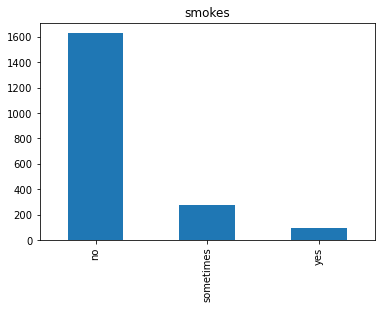

In [35]:
data['smokes'].value_counts().plot(kind='bar')
plt.title('smokes')
plt.show()

In [36]:
dummies=pd.get_dummies(data['smokes'],drop_first=True)
dummies

,sometimes,yes
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
1996,0,1
1997,0,0
1998,0,0
1999,0,0


In [37]:
dummies=dummies.rename(columns={'sometimes':'smokes_sometimes','yes':'smokes_yes'})

In [38]:

data=pd.concat([data,dummies],axis=1)


In [39]:
data.drop('smokes',axis=1,inplace=True)

In [40]:
data.to_csv('DataAfterSmokeTreatment.csv')

In [41]:
#handling body profile
data['body_profile'].value_counts()/len(data)*100

average           27.836082
fit               21.639180
athletic          19.240380
curvy              8.945527
thin               8.045977
a little extra     5.497251
skinny             3.248376
full figured       2.148926
overweight         1.249375
used up            0.999500
jacked             0.649675
rather not say     0.499750
Name: body_profile, dtype: float64

In [42]:
#merging body profile to levels
data['body_profile_labels']=data['body_profile'].apply(lambda x:1 if (x=='skinny' or x=='thin' or x=='used up')
                                                       else(3 if(x=='athletic' or x=='jacked') 
                                                       else(2 if (x=='average' or x=='fit')
                                                       else(4 if (x=='curvy' or x=='full figured' or x=='a little extra')else 5))))

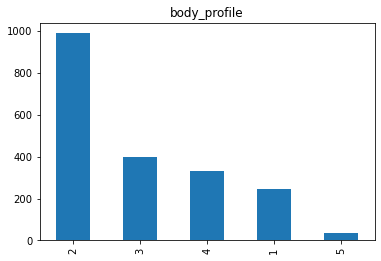

In [43]:
data['body_profile_labels'].value_counts().plot(kind='bar')
plt.title('body_profile')
plt.show()

In [44]:
data.to_csv('DataAfterBodyLabels.csv')

In [45]:
#handling column name - dropped out
dummies=pd.get_dummies(data['dropped_out'],drop_first=True)
dummies=dummies.rename(columns={'yes':'dropped_out_yes'})
dummies

,dropped_out_yes
0,0
1,0
2,0
3,0
4,1
...,...
1996,0
1997,0
1998,0
1999,0


In [46]:
data=pd.concat([data,dummies],axis=1)

In [47]:
data.drop('dropped_out',axis=1,inplace=True)

In [48]:
#handling location preference 
dummies=pd.get_dummies(data['location_preference'],drop_first=True)
dummies=dummies.rename(columns={'same city':'location_same_city','same state':'location_same_state'})
dummies

,location_same_city,location_same_state
0,0,1
1,0,0
2,1,0
3,1,0
4,1,0
...,...,...
1996,1,0
1997,0,1
1998,0,0
1999,1,0


In [49]:
data=pd.concat([data,dummies],axis=1)
data.drop('location_preference',axis=1,inplace=True)

In [50]:
data.to_csv('DataAfterLocationPreferenceEncoding.csv')

In [51]:
# data=data.rename(columns={'2.1':'newlang_somewhat','3.1':'newlang_interested'})
data.columns

Index(['age', 'status', 'height', 'location', 'language', 'new_languages',
       'body_profile', 'education_level', 'bio', 'interests',
       'other_interests', 'sex_m', 'orientation_gay', 'orientation_straight',
       'drinks_often', 'drinks_rarely', 'drinks_socially', 'drugs_sometimes',
       'banking / financial / real estate', 'education / academia',
       'entertainment / media', 'executive / management', 'medicine / health',
       'other', 'sales / marketing / biz dev', 'science / tech / engineering',
       'student', 'likes dogs', 'likes cats', 'has dog', 'has cat',
       'dislikes dogs', 'dislike cats', 'smokes_sometimes', 'smokes_yes',
       'body_profile_labels', 'dropped_out_yes', 'location_same_city',
       'location_same_state'],
      dtype='object')

In [52]:
#merging status
data['status']=data['status'].apply(lambda x:'single' if x=='single' else 'other')

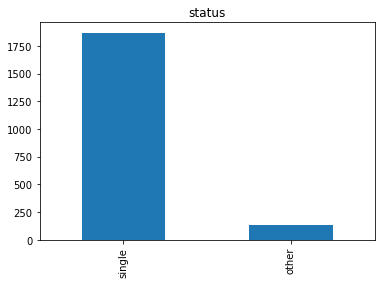

In [53]:
data['status'].value_counts().plot(kind='bar')
plt.title('status')
plt.show()

In [54]:
#handlling status column
dummies=pd.get_dummies(data['status'],drop_first=True)
dummies

,single
0,1
1,1
2,0
3,1
4,1
...,...
1996,1
1997,1
1998,1
1999,0


In [55]:
data=pd.concat([data,dummies],axis=1)
data.drop('status',axis=1,inplace=True)

In [56]:
data.to_csv('DataAfterStatusEncoding.csv')

In [57]:
#handling interest column
data['interests'].value_counts()/len(data)*100

music                7.746127
politics             5.247376
reading              5.247376
singing              5.047476
photography          4.597701
instruments          4.397801
video games          4.347826
sports               4.147926
painting             4.147926
movies               3.948026
dancing              3.748126
travelling           3.698151
cooking              3.348326
designing            3.198401
sketching            3.198401
craft                3.198401
food                 2.998501
diy                  2.448776
gardening            2.398801
writting             2.348826
studying             2.348826
yoga                 2.298851
social_networking    2.298851
organising events    2.148926
makeup               2.098951
acting               2.048976
astronomy            1.849075
calligraphy          1.649175
fishing              1.649175
collectibles         1.349325
camping              0.799600
Name: interests, dtype: float64

In [58]:
#merging interest
data['interest_merge']=data['interests'].apply(lambda x:'music' if x=='music' or x=='singinig' or x=='instruments' or x=='dance'
                                             else('artist' if x=='calligraphy' or x=='diy' or x=='painting' or x=='sketching' or x=='designing' or x=='craft' 
                                             else('game_video' if x=='video games' or x=='social_networking'
                                             else ('outdoor' if x=='fishing' or x=='sports' or x=='yoga' or x=='camping'
                                             else('movies' if x=='movies' or x=='acting' or x=='makeup'
                                             else ('read/write' if x=='reading' or x=='writting' else x))))))

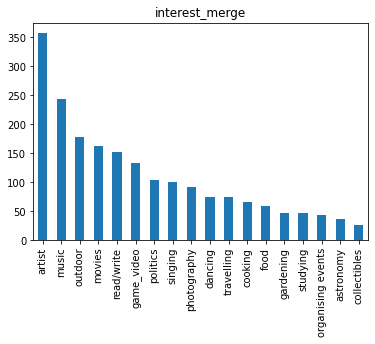

In [59]:
data['interest_merge'].value_counts().plot(kind='bar')
plt.title('interest_merge')
plt.show()

In [60]:
data[['interests','interest_merge']]

,interests,interest_merge
0,sports,outdoor
1,painting,artist
2,instruments,music
3,sketching,artist
4,craft,artist
...,...,...
1996,craft,artist
1997,makeup,movies
1998,singing,singing
1999,music,music


In [121]:
len(data['interests'].value_counts())

31

In [61]:
data.drop('interests',axis=1,inplace=True)

In [62]:
data.to_csv('DataAfterInterestMerge.csv')

In [63]:
dummies=pd.get_dummies(data['interest_merge'],drop_first=True)
dummies

,astronomy,collectibles,cooking,dancing,food,game_video,gardening,movies,music,organising events,outdoor,photography,politics,read/write,singing,studying,travelling
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [64]:
data=pd.concat([data,dummies],axis=1)
data.drop('interest_merge',axis=1,inplace=True)

In [65]:
data.columns

Index(['age', 'height', 'location', 'language', 'new_languages',
       'body_profile', 'education_level', 'bio', 'other_interests', 'sex_m',
       'orientation_gay', 'orientation_straight', 'drinks_often',
       'drinks_rarely', 'drinks_socially', 'drugs_sometimes',
       'banking / financial / real estate', 'education / academia',
       'entertainment / media', 'executive / management', 'medicine / health',
       'other', 'sales / marketing / biz dev', 'science / tech / engineering',
       'student', 'likes dogs', 'likes cats', 'has dog', 'has cat',
       'dislikes dogs', 'dislike cats', 'smokes_sometimes', 'smokes_yes',
       'body_profile_labels', 'dropped_out_yes', 'location_same_city',
       'location_same_state', 'single', 'astronomy', 'collectibles', 'cooking',
       'dancing', 'food', 'game_video', 'gardening', 'movies', 'music',
       'organising events', 'outdoor', 'photography', 'politics', 'read/write',
       'singing', 'studying', 'travelling'],
      dtype='o

In [66]:
data.head(3)

,age,height,location,language,new_languages,body_profile,education_level,bio,other_interests,sex_m,...,movies,music,organising events,outdoor,photography,politics,read/write,singing,studying,travelling
0,27,66.0,oakland,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,bottom line i love life! i work hard and i lov...,instruments,0,...,0,0,0,1,0,0,0,0,0,0
1,26,68.0,pleasant hill,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,"i'm a straightforward, genuine, fun loving (i'...",instruments,1,...,0,0,0,0,0,0,0,0,0,0
2,20,69.0,oakland,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,mmmmm yummy tacosss. yoga is where it's at. i ...,dancing,0,...,0,1,0,0,0,0,0,0,0,0


In [67]:
#language,other_interest and new lang not including in project ,, body profile already encoded
data.drop(['language','new_languages','body_profile','other_interests'],axis=1,inplace=True)
data.columns

Index(['age', 'height', 'location', 'education_level', 'bio', 'sex_m',
       'orientation_gay', 'orientation_straight', 'drinks_often',
       'drinks_rarely', 'drinks_socially', 'drugs_sometimes',
       'banking / financial / real estate', 'education / academia',
       'entertainment / media', 'executive / management', 'medicine / health',
       'other', 'sales / marketing / biz dev', 'science / tech / engineering',
       'student', 'likes dogs', 'likes cats', 'has dog', 'has cat',
       'dislikes dogs', 'dislike cats', 'smokes_sometimes', 'smokes_yes',
       'body_profile_labels', 'dropped_out_yes', 'location_same_city',
       'location_same_state', 'single', 'astronomy', 'collectibles', 'cooking',
       'dancing', 'food', 'game_video', 'gardening', 'movies', 'music',
       'organising events', 'outdoor', 'photography', 'politics', 'read/write',
       'singing', 'studying', 'travelling'],
      dtype='object')

In [68]:
#handling location col
#top 20 locations contributing to 87% of total count so other than top 20 will be "other"
top_20_locations=data['location'].value_counts()[:20]

In [69]:
data['location']=data['location'].apply(lambda x: x if x in top_20_locations else "other")

In [70]:
data['location'].value_counts()

san francisco    911
other            252
oakland          250
berkeley         146
san mateo         56
palo alto         45
alameda           35
san rafael        35
san leandro       33
redwood city      28
emeryville        27
daly city         27
walnut creek      24
hayward           21
pacifica          18
el cerrito        17
menlo park        16
mountain view     15
martinez          15
richmond          15
burlingame        15
Name: location, dtype: int64

In [71]:
# getting dummies of location columns
dummies=pd.get_dummies(data['location'],drop_first=True)
dummies

,berkeley,burlingame,daly city,el cerrito,emeryville,hayward,martinez,menlo park,mountain view,oakland,other,pacifica,palo alto,redwood city,richmond,san francisco,san leandro,san mateo,san rafael,walnut creek
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [72]:
data=pd.concat([data,dummies],axis=1)
#dropping other interest and location colum
data.drop(['location'],axis=1,inplace=True)
data.head(3)

,age,height,education_level,bio,sex_m,orientation_gay,orientation_straight,drinks_often,drinks_rarely,drinks_socially,...,other,pacifica,palo alto,redwood city,richmond,san francisco,san leandro,san mateo,san rafael,walnut creek
0,27,66.0,4.0,bottom line i love life! i work hard and i lov...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,26,68.0,3.0,"i'm a straightforward, genuine, fun loving (i'...",1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,20,69.0,2.0,mmmmm yummy tacosss. yoga is where it's at. i ...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data.to_csv('DataAfterLocationEncoding.csv')

In [75]:
#normalize height and age
from sklearn import preprocessing
x=data[['age','height']]
normalized_X = preprocessing.normalize(x)
normalized_X

array([[0.37863285, 0.92554696],
       [0.35713747, 0.93405183],
       [0.27839605, 0.96046637],
       ...,
       [0.3668682 , 0.93027293],
       [0.42579704, 0.9048187 ],
       [0.52196487, 0.85296698]])

In [76]:
data[['age_normalized','height_normalized']]=normalized_X

In [77]:
data.drop(['age','height'],axis=1,inplace=True)

In [78]:
data.columns

Index(['education_level', 'bio', 'sex_m', 'orientation_gay',
       'orientation_straight', 'drinks_often', 'drinks_rarely',
       'drinks_socially', 'drugs_sometimes',
       'banking / financial / real estate', 'education / academia',
       'entertainment / media', 'executive / management', 'medicine / health',
       'other', 'sales / marketing / biz dev', 'science / tech / engineering',
       'student', 'likes dogs', 'likes cats', 'has dog', 'has cat',
       'dislikes dogs', 'dislike cats', 'smokes_sometimes', 'smokes_yes',
       'body_profile_labels', 'dropped_out_yes', 'location_same_city',
       'location_same_state', 'single', 'astronomy', 'collectibles', 'cooking',
       'dancing', 'food', 'game_video', 'gardening', 'movies', 'music',
       'organising events', 'outdoor', 'photography', 'politics', 'read/write',
       'singing', 'studying', 'travelling', 'berkeley', 'burlingame',
       'daly city', 'el cerrito', 'emeryville', 'hayward', 'martinez',
       'menlo park

In [79]:
data.to_csv('DataAfterNormalization.csv')

In [80]:
#handling bio columnb


In [81]:
# Imports

import numpy as np
import pandas as pd
import re 
import string
import nltk
from nltk.corpus import words, stopwords
import pickle 
# Setting options

pd.set_option('display.max_colwidth', -1)
nltk.download('stopwords')
nltk.download('words')

# Load stop words
stop_words = stopwords.words('english')
wordlist = words.words()

<ipython-input-81-554c2044b897>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akadk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akadk\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [82]:
# Function for removing punctuation
def drop_punc(my_text):
    clean_text = re.sub('[%s]' % re.escape(string.punctuation), ' ', my_text)
    return clean_text

In [83]:
# Function for making all text lowercase
def lower(my_text):
    clean_text = my_text.lower()
    return clean_text

In [84]:
# Function for removing all numbers
def remove_numbers(my_text):
    clean_text = re.sub('\w*\d\w*', '', my_text)
    return clean_text

In [85]:
# Function for removing emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [86]:
# Function for removing stop words
def remove_stop(my_text):
    text_list = my_text.split()
    return ' '.join([word for word in text_list if word not in stop_words])

In [87]:
# Function for stripping whitespace
def my_strip(my_text):
    try: return my_text.strip()
    except Exception as e: return None

In [88]:
# Curated list of additional stop-words for this project
my_stop_words = ['mmmmm','im']

# Function for removing my stop words
def remove_my_stop(my_text):
    text_list = my_text.split()
    return ' '.join([word for word in text_list if word not in my_stop_words])

In [89]:
## to determine the language of the bio

# Function to detect english
def is_english(my_text):
    if my_text is None:
        return my_text
    text_list = my_text.split()
    english = 0
    non_english = 0
    for word in text_list:
        if word not in wordlist:
            non_english += 1
        else:
            english += 1
    if english > 0.25*non_english:
        return True
    else: return False

In [90]:
test = data.sample(50)

In [91]:
data['bio_cleaned'] = data['bio'].apply(lower).apply(drop_punc).apply(remove_numbers).apply(deEmojify)
data['bio_cleaned'] = data['bio_cleaned'].apply(remove_stop).apply(remove_my_stop)
data['bio_cleaned'] = data['bio_cleaned'].str.strip()

In [93]:
# Pickling the tokenized words and bigrams
with open("clean_data.pkl", "wb") as fp:
    pickle.dump(data, fp)

Note: you may need to restart the kernel to use updated packages.


In [96]:
# Clustering (Vectorize and cluster with Word2vec)
# imports
# !pip install gensim
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

from gensim import corpora, models, similarities, matutils
from sklearn.cluster import KMeans, DBSCAN
import os

C:\Users\akadk\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [97]:
# Read in data
corpus = pd.read_pickle('clean_data.pkl')
corpus.shape

(2001, 71)

In [98]:
# Check it out
corpus['bio_cleaned'].head(5)

0    bottom line love life work hard love hard earth drama free plan keep way want know ask woman loves women sometimes feel like nut sometimes femme side butch side love trying new things spend day helping people check list going love making people laugh open meeting new people dating point taking care heart rushing anything value communication open minded                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [99]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib
from matplotlib import pyplot as plt
from joblib import dump, load

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from gensim import corpora, models, similarities, matutils

In [100]:
# Read in data
df = pd.read_pickle('clean_data.pkl')

In [101]:
# Vectorize the words with CountVectorizer. This takes a parameter 'stopwords', which I have left out 
# because I took care of stopwords in my cleaning phase 

# CountVectorizer().fit_transform returns a matrix where rows correspond to observations (documents) and 
# columns correspond to the counts of words in each observation. There are as many columns as number of unique 
# words in all documents

vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(df['bio_cleaned'])
doc_word.shape

(2001, 14074)

In [102]:
# TfidfVectorizer().fit_transform does something similar, but it computes the term frequency of a word with a document
# divided by the frequency of that word accross all documents. 
# Essentially, it is supposed to pick out words that are unique to a document as opposed to words that simply
# show up in many documents

tf_idf = TfidfVectorizer()
doc_word_tf_idf = tf_idf.fit_transform(df['bio_cleaned'])
doc_word_tf_idf.shape

(2001, 14074)

In [103]:
word2vec = models.Word2Vec(df['bio_cleaned'], vector_size=100, window=5, min_count=1, workers=2, sg=1)

In [104]:
# Use LSA to reduce dimensionality. I am going to guess we should use 15 TOPICS

# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
# Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)

# in here, we can either input "doc_word" or "doc_word_tf_idf" to used different vectorized forms of our words

num_topics = 15

lsa = TruncatedSVD(num_topics)
doc_topic = lsa.fit_transform(doc_word_tf_idf)
lsa.explained_variance_ratio_

array([0.0067713 , 0.00562136, 0.00473964, 0.00446469, 0.00397619,
       0.00363121, 0.00345108, 0.003295  , 0.00307099, 0.00294785,
       0.00285977, 0.00277326, 0.00274739, 0.00263222, 0.00252431])

In [105]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = list(range(num_topics)),
             columns = vectorizer.get_feature_names())
topic_word

,aa,aaa,aaaaand,aau,abandon,abandoned,abbey,abd,abducted,aber,...,zombies,zone,zoo,zookeeper,zooming,zoos,zu,zumba,zurich,zynga
0,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.0,...,0.001,0.005,0.000,0.000,0.000,0.001,0.000,0.001,0.001,0.000
1,0.000,-0.000,-0.001,0.003,-0.000,-0.001,-0.000,-0.000,0.000,-0.0,...,-0.001,-0.009,0.000,0.001,-0.000,-0.002,-0.001,-0.000,-0.000,-0.000
2,0.000,-0.001,-0.001,-0.001,-0.000,-0.002,-0.002,-0.001,0.000,-0.0,...,-0.001,0.001,0.000,-0.000,-0.000,-0.000,-0.001,-0.000,0.000,-0.001
3,0.001,0.000,-0.001,-0.001,0.000,-0.000,0.002,0.000,-0.000,0.0,...,0.002,-0.007,0.000,0.000,0.000,-0.001,0.000,0.001,0.000,0.000
4,-0.001,-0.001,0.001,-0.002,-0.000,-0.001,0.000,-0.000,-0.002,0.0,...,0.003,-0.005,0.000,-0.001,0.001,0.001,0.001,-0.000,0.001,-0.000
5,-0.001,-0.001,-0.000,0.003,0.000,0.001,-0.000,-0.000,-0.000,0.0,...,-0.003,0.017,-0.001,0.001,-0.002,-0.001,0.002,0.001,-0.000,-0.000
6,-0.000,-0.001,0.001,0.004,0.000,0.000,0.001,-0.001,-0.000,0.0,...,0.001,-0.004,0.001,-0.001,0.001,-0.000,0.000,-0.000,-0.000,0.001
7,-0.001,0.001,-0.001,-0.003,0.000,0.000,-0.001,-0.000,-0.000,-0.0,...,-0.004,0.005,0.001,0.001,0.001,-0.002,-0.000,0.001,-0.001,-0.001
8,0.002,0.000,-0.000,0.003,0.001,0.000,-0.001,-0.001,-0.000,-0.0,...,0.000,0.001,-0.001,-0.000,0.002,-0.001,-0.001,-0.001,-0.001,0.001
9,0.001,0.001,-0.001,-0.001,0.000,-0.003,-0.000,0.000,0.002,-0.0,...,0.003,0.004,-0.001,0.000,0.000,-0.001,-0.002,-0.000,0.001,0.000


In [106]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [107]:
# Let's check out our topics!

display_topics(lsa, vectorizer.get_feature_names(), 15)


Topic  0
love, like, life, people, new, good, things, enjoy, time, someone, friends, looking, fun, also, going

Topic  1
moved, new, bay, san, francisco, area, years, born, east, city, sf, lived, living, raised, ago

Topic  2
love, life, enjoy, fun, someone, family, looking, loving, share, good, new, travel, outdoors, wine, laugh

Topic  3
love, like, things, music, games, really, laugh, food, movies, learning, dance, also, play, cook, art

Topic  4
going, new, like, easy, enjoy, fun, guy, people, things, movies, person, meet, watching, good, meeting

Topic  5
new, people, love, meet, meeting, know, things, want, laugh, make, learning, trying, open, find, fun

Topic  6
fun, love, easy, guy, going, back, girl, years, loving, laid, know, smart, hang, want, nice

Topic  7
good, easy, life, humor, sense, going, people, enjoy, self, take, always, person, friendly, seriously, laid

Topic  8
good, people, love, like, humor, time, meet, sense, nice, looking, guy, great, francisco, conversatio

In [108]:
# Check out the Vt matrix, to see how each document falls along the topics:

Vt = pd.DataFrame(doc_topic.round(5),
             index = df['bio_cleaned'],
             columns = ['1', '2', '3', '4', '5', 
                        '6', '7', '8', '9', '10', 
                        '11', '12', '13', '14', '15'])
Vt.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
bio_cleaned,,,,,,,,,,,,,,,
bottom line love life work hard love hard earth drama free plan keep way want know ask woman loves women sometimes feel like nut sometimes femme side butch side love trying new things spend day helping people check list going love making people laugh open meeting new people dating point taking care heart rushing anything value communication open minded,0.31572,-0.03756,0.06604,0.08091,0.00779,0.26899,0.03625,0.04051,0.04061,0.01504,-0.05579,0.00359,-0.02980,-0.01287,0.04120
straightforward genuine fun loving serious profile may make grounded guy bend backwards care pushover love simple things like night little spoon grabbing bite eat friends watching tv vegging friends decide something love active outdoors enjoying sun fresh air well filipino german hybrid identify pacific islander caucasian asian best way stick foot mouth calling asian also call hapa born raised california dark blonde hair knew right green eyes svelte dancer build enjoys cocktails non smoker doesnt drugs bottom include matter grand scheme relationship like topping sassy straightforward intelligent earth fun loving driven tactile sexual sensitive even though try hide genuine responsible loyal caring friendly cordial like people talk match ideal respond assume response conveys interest monosyllabic responses good indications interested looking fun many different forms platonic friends friends benefits dating relationship enjoy things cooking hanging friends watching movies dining social libating bars clubs outdoor activities road trips cuddling especially cuddling great big spoon giving massages bowling gourd art many things looking guys love life enjoy social look guy born male fluent english ages anyone really least taller american type looks anything goes long looks good find attractive slim muscular relative fitness level comparison mannerisms middle road masculine non smokers includes marijuana hookah okay drug users alcohol acceptable good kisser big spoon type take charge guy intelligent humorous affectionate highly sexual vers top total top deal breakers guys lie thier age stupid things like flakey guys guys smoke cigarettes marijuana illegal drugs guys women clothing guys wear makeup eyeliner mascara consealer gesticulate bad kissers bottom top passive general guys use girl refer another gay male among unwanted traits get gist please close hour car maybe hours looking pen pals please waste time messaging around bay area,0.25656,-0.05581,0.01405,-0.02945,0.05579,-0.07089,0.01265,-0.00185,0.06845,0.01661,-0.03479,-0.02556,0.06618,-0.06747,-0.05050
yummy tacosss yoga love life part content person easy pleaser free spirit home body want good things world live every day normally get long people active favorite color pink prissy generally well people amount girls associate limited okay like cars ended friend wanted wanted share entertainment site mean use friends men life first bf second chinchilla nicco work go school spend much time world sounds okay message,0.23218,-0.04303,-0.03030,0.01054,-0.05864,0.00562,0.00198,0.04061,-0.00833,-0.00735,-0.03452,-0.06005,-0.11507,0.03565,0.01333
stealth geek special mix technical obsession enough social awareness look like something revenge nerds hip knew self image would like project one somebody far cooler sort would love covered tattoos save fact explain portrait crazed charles bronson grandkids bicycle fixed gear folds half instead sport gigantic mustache hopes mistaken self confidence,0.08770,-0.04409,-0.02757,0.03185,-0.03503,-0.00601,-0.01916,-0.02699,0.00113,0.01285,0.00251,0.02686,0.03490,-0.03282,0.00266
whisper wind weaved curls crashing waves tide spit onto sands time left demise,0.01746,0.00233,-0.01028,0.00032,-0.00593,-0.00919,-0.00562,-0.00319,0.01557,-0.00666,-0.00270,-0.00711,-0.02524,0.02086,-0.00015


In [109]:
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rcdefaults()
matplotlib.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


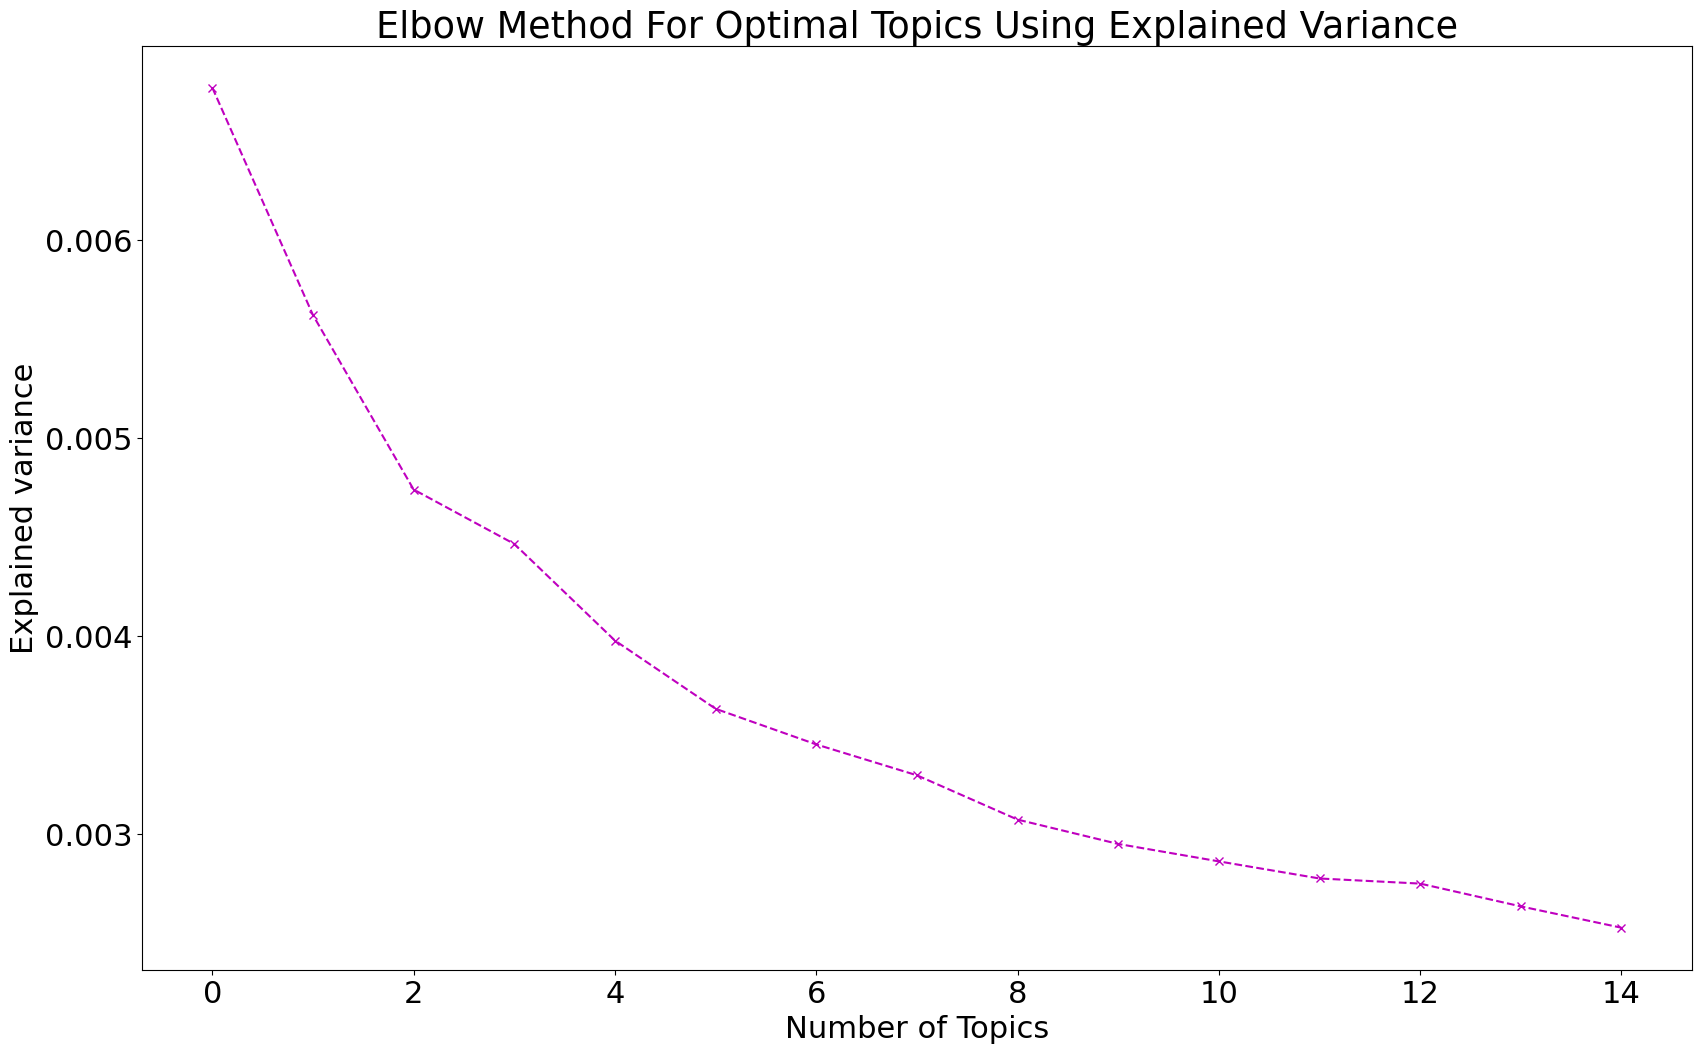

In [110]:
### Create a scree plot to see how many topics to include
plt.figure(figsize=(20,12))
plt.plot(lsa.explained_variance_ratio_, 'mx--')
plt.xlabel('Number of Topics')
plt.ylabel('Explained variance');
plt.title('Elbow Method For Optimal Topics Using Explained Variance');
plt.savefig('topic.png', dpi=200)

In [111]:
# Use NMF to reduce dimensionality. NMF might be better because it doesn't require that the topic axes are 
# orthogonal

num_topics = 6

nmf_model = NMF(num_topics, random_state=42)
doc_topic_nmf = nmf_model.fit_transform(doc_word)

In [112]:
# Copy of the above cell but using tf_idf instead of count-vectorizer

num_topics = 6

nmf_model_tf_idf = NMF(num_topics, random_state=42)
doc_topic_nmf_tf_idf = nmf_model_tf_idf.fit_transform(doc_word_tf_idf)

In [113]:
# Check out the Vt matrix, to see how each document falls along the topics:

Vt_nmf = pd.DataFrame(doc_topic_nmf.round(5),
             index = df['bio_cleaned'],
             columns = ['Love', 'Travel', 'Friends', 'Fun', 'Humor', 'Music'])

In [114]:
# Let's look at the documents as represented within the topics
Vt_nmf.sample(10)

,Love,Travel,Friends,Fun,Humor,Music
bio_cleaned,,,,,,
american born chinese height athletic youngest family loves drive socialize worked retail job around tourist industry shy asian guy,0.00000,0.00069,0.04096,0.00000,0.00680,0.01689
basics single female kids migrated city alameda little space actually like people work job overall life pretty good looking get better,0.09581,0.00000,0.05349,0.02730,0.09433,0.00000
passionate smart witty man genrous heart love fun good conversation great adventures quatlity quiet time enjoy trying new things meeting new people exploring country city foot bike boat creating new friendships sharing food important single dad kids half time good dad something important love travel back packed extensively mexico central america driven berkeley costa rica also visite cuba ireland france canada traveled extensively us love explore beauty nature cities people cultures sail quite bit lovely sailboat also love ride bikes snowboard read go movies listen live music attend sporting events dance currently manage technology group software company life professional photographer floral designer ditch digger construction worker martial arts instructor national park ranger,0.00000,0.45113,0.50974,0.00000,0.08790,0.00000
recently moved bay area spending past year living chicago originally texas lived life laid back chill person although also type like stay busy keep mind active love meeting new people although pretty shy first break shell consider introverted extrovert open become life party may make greatest first impression know love told many many friends love travel loves include movies books good food good drinks bowling karaoke dancing people know fun various things also dance floor never resist pull karaoke microphone,0.09770,0.33166,0.30524,0.05288,0.19352,0.00000
like pasta bourbon shoes dogs cheese airports classic rock dirty jokes traveling dive bars craig ferguson family sunshine thunderstorms oxford comma dislike tomatoes yelling misspellings fake butter nicolas cage dessert wines toddlers willful stupidity pretty easy going like good food also cheetos breakfast yesterday particularly athletic love outdoors love travel especially areas need soap good pair shoes lived abroad places daydream,0.20679,0.21689,0.03418,0.00000,0.03030,0.00000
happy fulfilled woman love family friends grateful love work interested companion depth sincerity wants travel explore soulful life maybe raise another golden retriever happy living country working city like experiences would happy one end spectrum interests diverse ecstatic wander around nyc paris equally engaged trek nepal,0.08419,0.21107,0.05088,0.00000,0.13843,0.00698
easy going lot driven thoughtful really love music working hard everything totally want go snow boarding rock climbing definitely want brush vinyl head nashville,0.01318,0.12063,0.04337,0.05356,0.01434,0.00000
howdy slow unchallenged personal reflection never jam recently find enjoying life incredibly swamped deadlines nearly impossible creative deadlines kinda best,0.00000,0.00128,0.00410,0.00000,0.09050,0.00841
passed picture phase little great date enjoy maintaing healthy lifestyle physically mentally love parents rest family love trail run afraid commitment enjoy cooking environmentally conscious get passionate heated times conversations time good listener brew beer support local artisan businesses try travel often possible optimistic happy life idea every new person new experience adds come good family hold values important comfortable skin confident clean responsible money keep friendships value close relationships volunteer locally internationally enjoy skinny dipping forms water hot springs rivers lakes ocean make coffee french press daily experience somewhat old soul comes dating believe showing woman feel instead telling never cheated partner game player women say hopeless romantics well believe shared creative romance characteristics look woman optimistic spirit believes something confident

In [115]:
display_topics(nmf_model_tf_idf, tf_idf.get_feature_names(), 10)


Topic  0
like, really, know, get, people, think, things, one, say, want

Topic  1
bay, years, moved, area, san, francisco, back, born, lived, sf

Topic  2
love, life, travel, laugh, family, dance, music, city, food, hard

Topic  3
someone, looking, life, fun, share, woman, partner, want, would, find

Topic  4
enjoy, going, good, like, easy, movies, music, friends, also, watching

Topic  5
new, people, meet, meeting, things, trying, learning, always, open, enjoy


In [116]:
# It seems like the best combination so far is NMF with TF-IDF.

# (1) Knowing each other (2) Moved out (3) Full of life (4) Fun Partner (5) Easy Going (6) Meeting new people
# Using NMF with CountVectorizer to classify documents
# Let's make a function for this

topics = ['Knowing each other','Explore','Full of life','Fun Partner','Easy Going','Meeting new people']
def nmf_predict(vectorizer, model, text):
    text_vect = vectorizer.transform([text])
    result = model.transform(text_vect)
    return topics[np.argmax(result)]

In [117]:
# Test it out!

test = 'Since start I knew you wanted to talk something, there was some burden like thing you are carrying within you. You say freely I would listen to it, dont hold any hesitations, trust me.'

nmf_predict(vectorizer=tf_idf, model=nmf_model_tf_idf, text = test)

'Knowing each other'

In [118]:
# copy the dataframe
df_w_labels = df.copy()

In [119]:
#df.drop(df.iloc[:, 0:22], axis=1)
df.head()

,education_level,bio,sex_m,orientation_gay,orientation_straight,drinks_often,drinks_rarely,drinks_socially,drugs_sometimes,banking / financial / real estate,...,redwood city,richmond,san francisco,san leandro,san mateo,san rafael,walnut creek,age_normalized,height_normalized,bio_cleaned
0,4.0,bottom line i love life! i work hard and i love hard! i'm down to earth... drama free and plan to keep it that way... if you want to know more about me just ask! i'm a woman with loves other women!. sometimes you feel like a nut sometimes you don't... i have a femme side and a butch side. i love trying new things. i spend my day helping people so i can check that off the list. i'm very out going and i love making people laugh! i'm open to meeting new people and dating. at this point i'm taking care of my heart and not rushing anything. i value communication and being open-minded.,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.378633,0.925547,bottom line love life work hard love hard earth drama free plan keep way want know ask woman loves women sometimes feel like nut sometimes femme side butch side love trying new things spend day helping people check list going love making people laugh open meeting new people dating point taking care heart rushing anything value communication open minded
1,3.0,"i'm a straightforward, genuine, fun loving (i'm not as serious as my profile may make me out to be), grounded guy that will bend over backwards for those i care for, but am not a pushover. i love simple things like a night in being little spoon, grabbing a bite to eat with friends, watching tv and vegging out with friends until we decide to do something. i love being active outdoors enjoying the sun and fresh air, as well. i am a filipino-german hybrid (i identify as pacific islander and caucasian - not asian- the best way to stick your foot in your mouth is by calling me asian) also call myself a hapa, born and raised in california, 5'8"", 128lbs, dark blonde hair (who knew right?) and green eyes, svelte-dancer build, enjoys his cocktails, am a non-smoker and doesnt't do drugs, bottom only (i include this because it does matter in the grand scheme of a relationship- i don't like topping), i'm sassy, straightforward, intelligent, down to earth, fun loving, driven, tactile, sexual, sensitive (even though i try to hide it), genuine, responsible, loyal, caring, friendly, cordial and not like other people that will not talk to you because you don't match their ideal- i respond to all, but don't assume my response conveys interest-monosyllabic responses are good indications that i am not interested. i'm looking for fun in all its many different forms, from platonic friends, friends with benefits, dating to a relationship. i enjoy things from cooking, hanging out with friends, watching movies, dining out, social libating at the bars/clubs, outdoor activities, road trips, cuddling-especially cuddling with a great big spoon, giving massages, bowling, gourd art, and so many other things. i'm looking for guys that love life and enjoy being social. what i look for in a guy: born a male, fluent in english, ages 23-35 (but anyone over 21 really), at least 5'8"" it taller, all american type looks, but anything goes as long as it looks good on you (and i find you attractive), slim-muscular (relative fitness level in comparison to my own), mannerisms- middle of the road to masculine, non-smokers (this includes marijuana, hookah is okay), no drug users-alcohol is acceptable, a good kisser, big spoon type, a take charge guy, intelligent, humorous, affectionate, highly sexual, vers-top to total top. deal breakers- guys that lie about thier age or other stupid things like that, flakey guys, guys that smoke cigarettes/marijuana, does illegal drugs, guys that own women's clothing, guys that wear makeup (more than eyeliner, mascara, or consealer), over gesticulate, bad kissers, and who are more bottom more than top or just passive in general, guys that use ""girl"" to refer to an

In [120]:
# get all the labels using the above function
labels = []
for index, row in df.iterrows():
    x = nmf_predict(vectorizer=tf_idf, model=nmf_model_tf_idf, text = row['bio_cleaned'])
    labels.append(x)

In [121]:
# assign the labels to a new column
df_w_labels['labels'] = labels

In [122]:
# check it out!
df_w_labels.sample(20)

,education_level,bio,sex_m,orientation_gay,orientation_straight,drinks_often,drinks_rarely,drinks_socially,drugs_sometimes,banking / financial / real estate,...,richmond,san francisco,san leandro,san mateo,san rafael,walnut creek,age_normalized,height_normalized,bio_cleaned,labels
820,3.0,"i was born, raised, and still living in san francisco. i am currently working for a great company doing the selling enterprise software in the financial district. i enjoy working hard, experiencing new events, meeting new people.",1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0.384615,0.923077,born raised still living san francisco currently working great company selling enterprise software financial district enjoy working hard experiencing new events meeting new people,Meeting new people
261,3.0,hi! i love all kinds of outdoor stuff and i'm super into the awesome sf food-drink scene. i work 50-hours/week and have dreams of getting out of town more. get in touch if you have your act together and are looking for an honest girl to perhaps share some time.,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0.429934,0.902861,hi love kinds outdoor stuff super awesome sf food drink scene work hours week dreams getting town get touch act together looking honest girl perhaps share time,Fun Partner
169,2.0,"when i get homesick, i listen to classical music because i miss my cello. right now, i'm obsessed with idyll mvt 7 by leon janacek. it has a really passionate middle section (with a bitchin' divided cello part at said passionate part). let's see, i'm a uc berkeley student and proud of it. i'm an avid atheist, but i'm (or i like to think that i'm) not one of those rude ones. everyone's entitled to his or her beliefs, and i definitely have mine too. i'm a huge nerd in nearly every way, i'm an aspiring computer science major, i absolutely love web designing (the intricacies of css and html, oh! so beautiful!), i play a cello and, if i live for anything, it is to write. oh, and i love 420 to pieces!",0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.293002,0.956112,get homesick listen classical music miss cello right obsessed idyll mvt leon janacek really passionate middle section bitchin divided cello part said passionate part let see uc berkeley student proud avid atheist like think one rude ones everyone entitled beliefs definitely mine huge nerd nearly every way aspiring computer science major absolutely love web designing intricacies css html oh beautiful play cello live anything write oh love pieces,Full of life
882,3.0,"i am most frequently noisy, opinionated, quite generous, goofy, funny, serious, sweet, smart and very excitable. i say really inappropriate things and i like toilet humor and sex humor, and sometimes even toilet sex humor. that said, i also scrub up pretty well and you can take me just about anywhere without embarrassing yourself. i can be pushy and brave and stubborn when i want something, but also shy and reserved once you get to know me. call it closet introversion. i'm generally more thoughtful than spontaneous, but have made several huge life decisions on the spur of the moment. i'm critical, in an analytical way rather than a negative one. i'm unapologetically a morning person, and often fall asleep at my own parties. this may happen: http://imgur.com/gallery/xihoe i love animal documentaries, although sometimes they make me too upset and i have to leave the room (like when the baby polar bear is going to starve to death because of my excessive electricity usage). i'm here because i'm looking for a guy who's hot and sweet and funny and smart and wants to be in a relationship, and because so far i haven't found anyone who fits that description on muni.",0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0.390550,0.920582,frequently noisy opinionated quite generous goofy funny serious sweet smart excitable say really inappropriate things like toilet humor sex humor sometimes even toilet sex humor said also scrub pretty well take anywhere without embarrassing pushy brave stubborn want somethi

In [123]:
# Pickle the data so we can compare it with clusters
df_w_labels.to_pickle('df_w_labels.pkl')